In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,7

In [122]:
df=pd.read_csv('processed.csv')
df.head(2)

,USER TYPE,CATEGORY,1-Jan-09,1-Feb-09,1-Mar-09,1-Apr-09,1-May-09,1-Jun-09,1-Jul-09,1-Aug-09,...,1-Mar-15,1-Apr-15,1-May-15,1-Jun-15,1-Jul-15,1-Aug-15,1-Sep-15,1-Oct-15,1-Nov-15,1-Dec-15
0,H3,DOMESTICO MEDIO,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,25.2,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0


In [123]:
#list(df)

In [124]:
ex=list(df.columns[2:86].values)

In [125]:
len(ex)

84

In [126]:
# sliced=df.iloc[3,2:86]
# df1 = pd.DataFrame({'monthly consumption': ex,'consumption rate': sliced})
# ax = df1.plot.line(x='monthly consumption',y="consumption rate",rot=0,figsize=(20,20),color="red")

In [127]:
sliced=df.iloc[2,2:86]
df1 = pd.DataFrame({'monthly consumption': ex,'consumption rate': sliced})
#ax = df1.plot.line(x='monthly consumption',y="consumption rate",rot=0,figsize=(20,20),color="red")

In [128]:
df1['monthly consumption']=pd.to_datetime(df1['monthly consumption'],infer_datetime_format=True)
indexedDf=df1.set_index(['monthly consumption'])

In [129]:
indexedDf.tail()

,consumption rate
monthly consumption,
2015-08-01,18
2015-09-01,17
2015-10-01,17
2015-11-01,18
2015-12-01,9


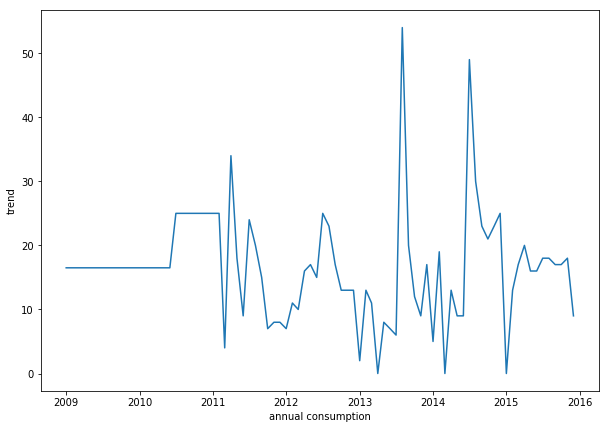

In [130]:
plt.xlabel('annual consumption')
plt.ylabel('trend')
plt.plot(indexedDf)

# checking for stationality using rolling statistics

In [131]:
rolmean=indexedDf.rolling(window=12).mean()
rolstd=indexedDf.rolling(window=12).std()
print(rolmean,rolstd)

                     consumption rate
monthly consumption                  
2009-01-01                        NaN
2009-02-01                        NaN
2009-03-01                        NaN
2009-04-01                        NaN
2009-05-01                        NaN
2009-06-01                        NaN
2009-07-01                        NaN
2009-08-01                        NaN
2009-09-01                        NaN
2009-10-01                        NaN
2009-11-01                        NaN
2009-12-01                  16.500000
2010-01-01                  16.500000
2010-02-01                  16.500000
2010-03-01                  16.500000
2010-04-01                  16.500000
2010-05-01                  16.500000
2010-06-01                  16.500000
2010-07-01                  17.208333
2010-08-01                  17.916667
2010-09-01                  18.625000
2010-10-01                  19.333333
2010-11-01                  20.041667
2010-12-01                  20.750000
2011-01-01  

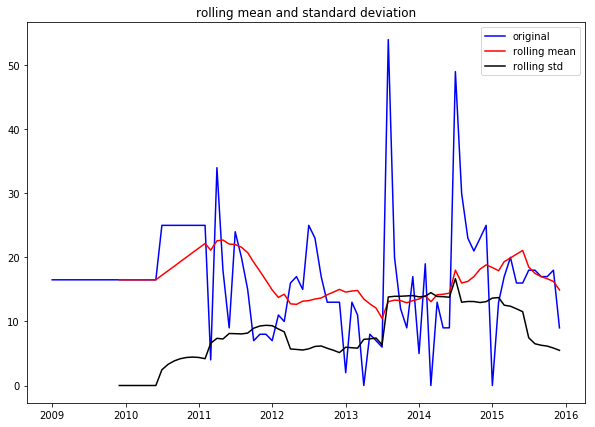

In [132]:
orig=plt.plot(indexedDf,color="blue",label="original")
mean=plt.plot(rolmean,color="red",label="rolling mean")
std=plt.plot(rolstd,color="black",label="rolling std")
plt.legend(loc="best")
plt.title('rolling mean and standard deviation')
plt.show(block=False)

# check stationality using Dickey Fuller test

In [133]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller-test:')
dftest=adfuller(indexedDf['consumption rate'], autolag='AIC')# AIC gives you the actual value you would want to obtainstrong analysis
dfoutput=pd.Series(dftest[0:4], index=['Test statistics','p-value','#lags used','No. of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value(%s)'%key]=value
print(dfoutput)
# from dickey fuller test our null hypothesis P-value should be small at around 0.5
#and always critical value should be higher than the test statistics for stationality so therefor data is non stational

Results of Dickey Fuller-test:
Test statistics            -7.354977e+00
p-value                     9.834389e-11
#lags used                  0.000000e+00
No. of observations used    8.300000e+01
critical value(1%)         -3.511712e+00
critical value(5%)         -2.897048e+00
critical value(10%)        -2.585713e+00
dtype: float64


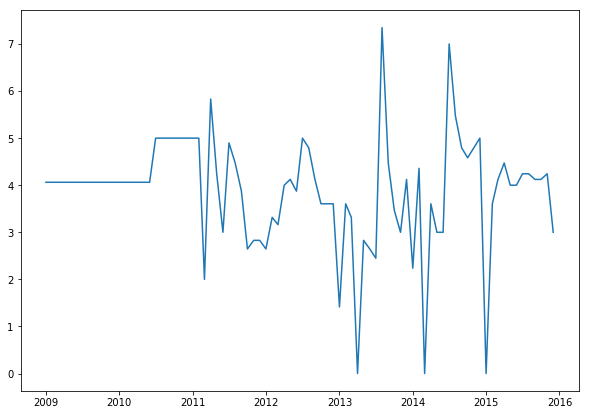

In [134]:
#estimating the trend
#indexedDf_logScale= np.log(indexedDf.astype(np.float64))
indexedDf_logScale=np.sqrt(indexedDf.astype(np.float64))
plt.plot(indexedDf_logScale)


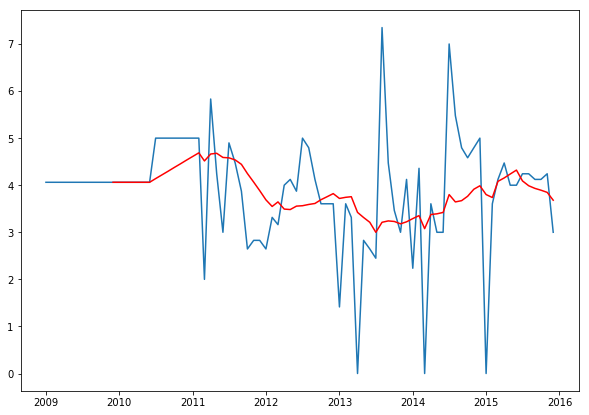

In [135]:
movingAverage=indexedDf_logScale.rolling(window=12).mean()
movingSTD=indexedDf_logScale.rolling(window=12).std()
plt.plot(indexedDf_logScale)
plt.plot(movingAverage,color="red")

In [136]:
diffinscale=indexedDf_logScale-movingAverage
diffinscale.head(12)
#lets remove the nan values
diffinscale.dropna(inplace=True)
diffinscale.tail(10)

,consumption rate
monthly consumption,
2015-03-01,0.040966
2015-04-01,0.317781
2015-05-01,-0.237688
2015-06-01,-0.321021
2015-07-01,0.151399
2015-08-01,0.254281
2015-09-01,0.190807
2015-10-01,0.229096
2015-11-01,0.394730


# getting rolling stats now

In [137]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(timeseries):
    #determining rolling stats
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    #plotting them
    orig=plt.plot(indexedDf,color="blue",label="original")
    mean=plt.plot(movingAverage,color="red",label="rolling mean")
    std=plt.plot(movingSTD,color="black",label="rolling std")
    plt.legend(loc="best")
    plt.title('rolling mean and standard deviation')
    plt.show(block=False)
    #performing dickey test
    print('Results of Dickey Fuller-test:')
    dftest=adfuller(timeseries['consumption rate'], autolag='AIC')# AIC gives you the actual value you would want to obtainstrong analysis
    dfoutput=pd.Series(dftest[0:4], index=['Test statistics','p-value','#lags used','No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value(%s)'%key]=value
    print(dfoutput)
    


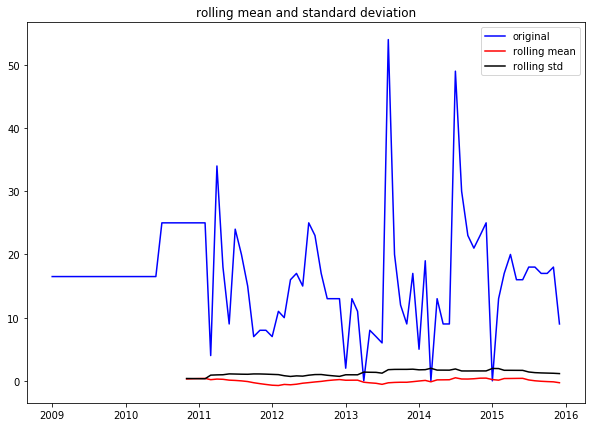

Results of Dickey Fuller-test:
Test statistics            -7.266880e+00
p-value                     1.626284e-10
#lags used                  0.000000e+00
No. of observations used    7.200000e+01
critical value(1%)         -3.524624e+00
critical value(5%)         -2.902607e+00
critical value(10%)        -2.588679e+00
dtype: float64


In [138]:
testStationarity(diffinscale)

# checking trend of the time series

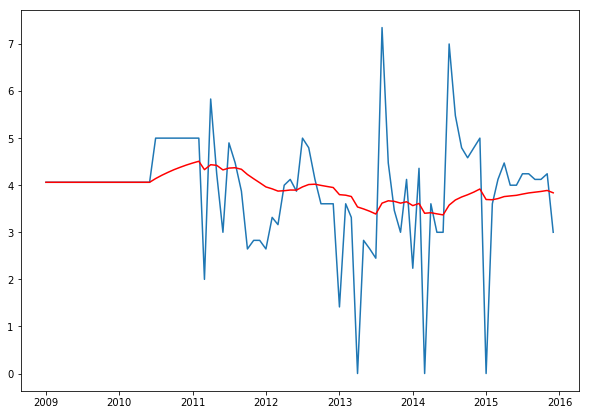

In [139]:
expavg=indexedDf_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDf_logScale)
plt.plot(expavg,color='red')

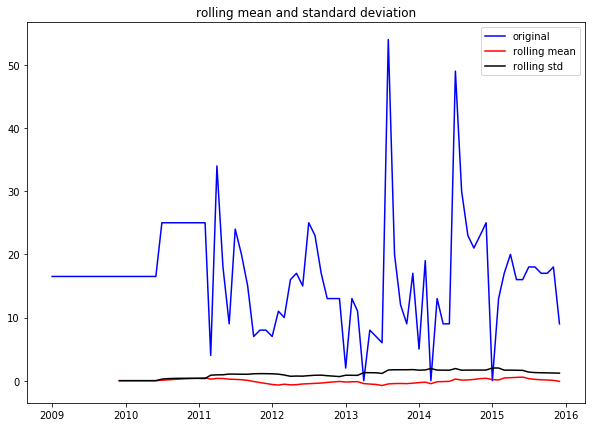

Results of Dickey Fuller-test:
Test statistics            -7.914008e+00
p-value                     3.879683e-12
#lags used                  0.000000e+00
No. of observations used    8.300000e+01
critical value(1%)         -3.511712e+00
critical value(5%)         -2.897048e+00
critical value(10%)        -2.585713e+00
dtype: float64


In [140]:
diffinexp=indexedDf_logScale-expavg
testStationarity(diffinexp)

# shift values in timeseries to use it for forecasting

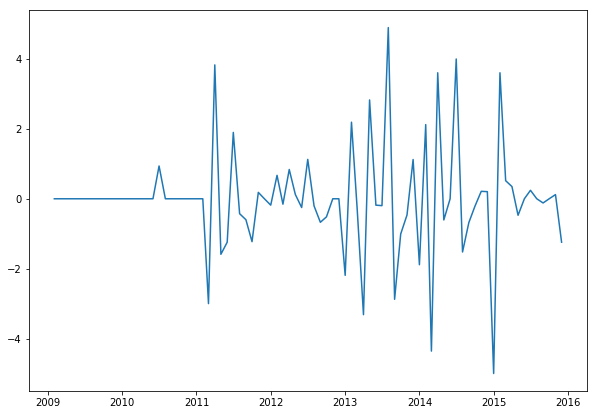

In [141]:
datasetshiftdiff=indexedDf_logScale-indexedDf_logScale.shift()
plt.plot(datasetshiftdiff)

# ARIMA MODEL NOW

## plotting the components of ARIMA model ie seasonality, trend,residual

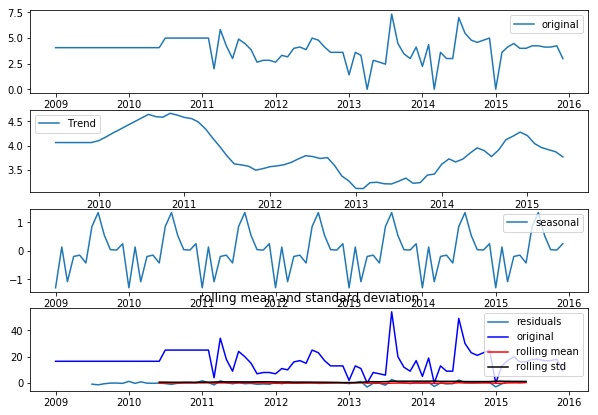

Results of Dickey Fuller-test:
Test statistics             -5.240408
p-value                      0.000007
#lags used                   6.000000
No. of observations used    65.000000
critical value(1%)          -3.535217
critical value(5%)          -2.907154
critical value(10%)         -2.591103
dtype: float64


In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDf_logScale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(indexedDf_logScale, label="original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout

decomposedData=residual
decomposedData.dropna(inplace=True)
testStationarity(decomposedData)

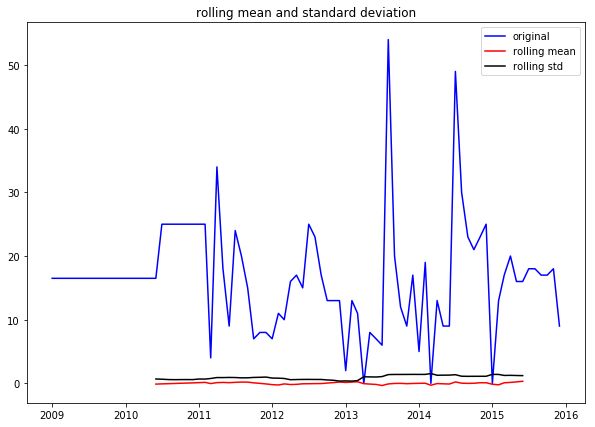

Results of Dickey Fuller-test:
Test statistics             -5.240408
p-value                      0.000007
#lags used                   6.000000
No. of observations used    65.000000
critical value(1%)          -3.535217
critical value(5%)          -2.907154
critical value(10%)         -2.591103
dtype: float64


In [143]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
testStationarity(decomposedLogData)

In [150]:
#from view above we see data is not stationary so we compute moving average through the ac pac values
#calculate q=auto correlation graph and p=partial auto correlation graph values

datasetshiftdiff.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
datasetshiftdiff.head(5)

,consumption rate
monthly consumption,
2009-01-01,NaN
2009-02-01,0.0
2009-03-01,0.0
2009-04-01,0.0
2009-05-01,0.0


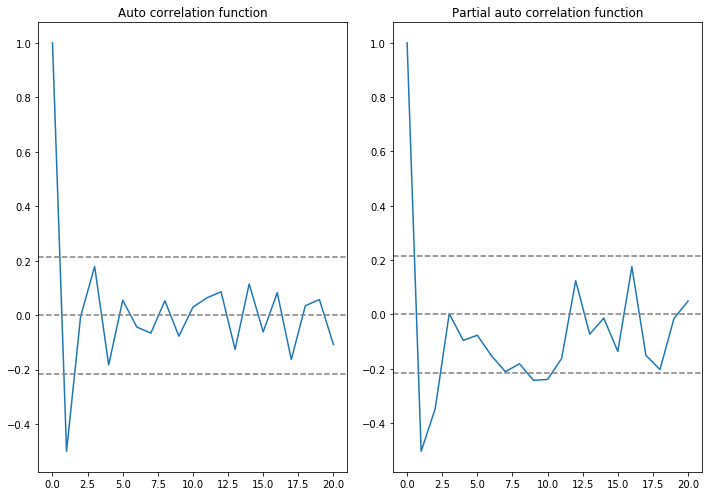

In [153]:
#PACF and ACF plots
from statsmodels.tsa.stattools import acf,pacf
lagacf=acf(datasetshiftdiff.iloc[1:],nlags=20)
lagpacf=pacf(datasetshiftdiff.iloc[1:],nlags=20,method='ols')#many methods but ols is better 'ordinary linear square method'

#ACF plot
plt.subplot(121)
plt.plot(lagacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetshiftdiff.iloc[1:])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetshiftdiff.iloc[1:])),linestyle='--', color='gray')
plt.title('Auto correlation function')

#plotting pacf
plt.subplot(122)
plt.plot(lagpacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetshiftdiff.iloc[1:])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetshiftdiff.iloc[1:])),linestyle='--', color='gray')
plt.title('Partial auto correlation function')
plt.tight_layout()